In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coordinated-attack-dataset-for-cids/CoAt_CIC-ToN-IoT-V2.parquet
/kaggle/input/coordinated-attack-dataset-for-cids/CoAt_CIC-IDS2017-V2.parquet
/kaggle/input/coordinated-attack-dataset-for-cids/CoAt_CIC-UNSW-NB15_Feeded-V2.parquet
/kaggle/input/coordinated-attack-dataset-for-cids/CoAt_CSE-CIC-IDS2018_Feeded.parquet
/kaggle/input/coordinated-attack-dataset-for-cids/CoAt_CIC-BoT-IoT-V2.parquet


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load dataset
df = pd.read_parquet('/kaggle/input/coordinated-attack-dataset-for-cids/CoAt_CIC-BoT-IoT-V2.parquet', engine='pyarrow')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6721774 entries, 12 to 11503553
Data columns (total 79 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Protocol                  int8   
 1   Flow Duration             int64  
 2   Total Fwd Packets         int32  
 3   Total Backward Packets    int32  
 4   Fwd Packets Length Total  float64
 5   Bwd Packets Length Total  float64
 6   Fwd Packet Length Max     float64
 7   Fwd Packet Length Min     float32
 8   Fwd Packet Length Mean    float32
 9   Fwd Packet Length Std     float32
 10  Bwd Packet Length Max     float64
 11  Bwd Packet Length Min     float32
 12  Bwd Packet Length Mean    float32
 13  Bwd Packet Length Std     float32
 14  Flow Bytes/s              float64
 15  Flow Packets/s            float64
 16  Flow IAT Mean             float32
 17  Flow IAT Std              float32
 18  Flow IAT Max              float64
 19  Flow IAT Min              float64
 20  Fwd IAT Total             f

In [5]:
# Encode labels numerically
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

In [6]:
# Get the list of unique classes
unique_classes = label_encoder.classes_
num_classes = len(unique_classes)

In [7]:
# Prepare feature data
X = df.drop(['Label', 'Attack'], axis=1).values
y = df['Label'].values

In [8]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

In [11]:
# Build the neural network for multiclass classification
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
117631/117631 ━━━━━━━━━━━━━━━━━━━━ 194s 2ms/step - accuracy: 0.8510 - loss: 0.3129 - val_accuracy: 0.8633 - val_loss: 0.2840
Epoch 2/10
117631/117631 ━━━━━━━━━━━━━━━━━━━━ 192s 2ms/step - accuracy: 0.8574 - loss: 0.2964 - val_accuracy: 0.8624 - val_loss: 0.2833
Epoch 3/10
117631/117631 ━━━━━━━━━━━━━━━━━━━━ 190s 2ms/step - accuracy: 0.8589 - loss: 0.2957 - val_accuracy: 0.8636 - val_loss: 0.2823
Epoch 4/10
117631/117631 ━━━━━━━━━━━━━━━━━━━━ 192s 2ms/step - accuracy: 0.8598 - loss: 0.2952 - val_accuracy: 0.8614 - val_loss: 0.2838
Epoch 5/10
117631/117631 ━━━━━━━━━━━━━━━━━━━━ 192s 2ms/step - accuracy: 0.8606 - loss: 0.2959 - val_accuracy: 0.8644 - val_loss: 0.2785
Epoch 6/10
117631/117631 ━━━━━━━━━━━━━━━━━━━━ 191s 2ms/step - accuracy: 0.8615 - loss: 0.3082 - val_accuracy: 0.8615 - val_loss: 0.2811
Epoch 7/10
117631/117631 ━━━━━━━━━━━━━━━━━━━━ 191s 2ms/step - accuracy: 0.8618 - loss: 0.2993 - val_accuracy: 0.8632 - val_loss: 0.2804
Epoch 8/10
117631/117631 ━━━━━━━━━━━━━━━━━━━━ 19

In [13]:
# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Decode the predicted labels back to the original class labels
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Classification report
print(classification_report(y_test_decoded, y_pred_decoded, target_names=unique_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)
print("Confusion Matrix:")
print(conf_matrix)

63017/63017 ━━━━━━━━━━━━━━━━━━━━ 72s 1ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Benign       0.97      0.54      0.70     11531
        DDoS       0.92      0.89      0.90   1435951
        Scan       0.74      0.79      0.77    568811
        Worm       0.00      0.00      0.00       240

    accuracy                           0.86   2016533
   macro avg       0.66      0.56      0.59   2016533
weighted avg       0.87      0.86      0.86   2016533

Confusion Matrix:
[[   6281     938    4312       0]
 [    136 1281655  154160       0]
 [     70  116760  451981       0]
 [      7       0     233       0]]


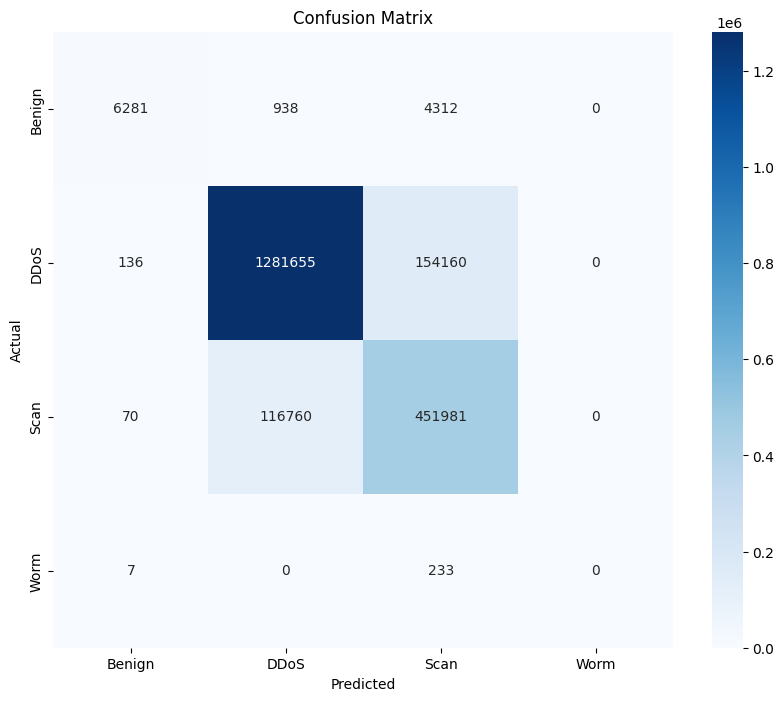

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

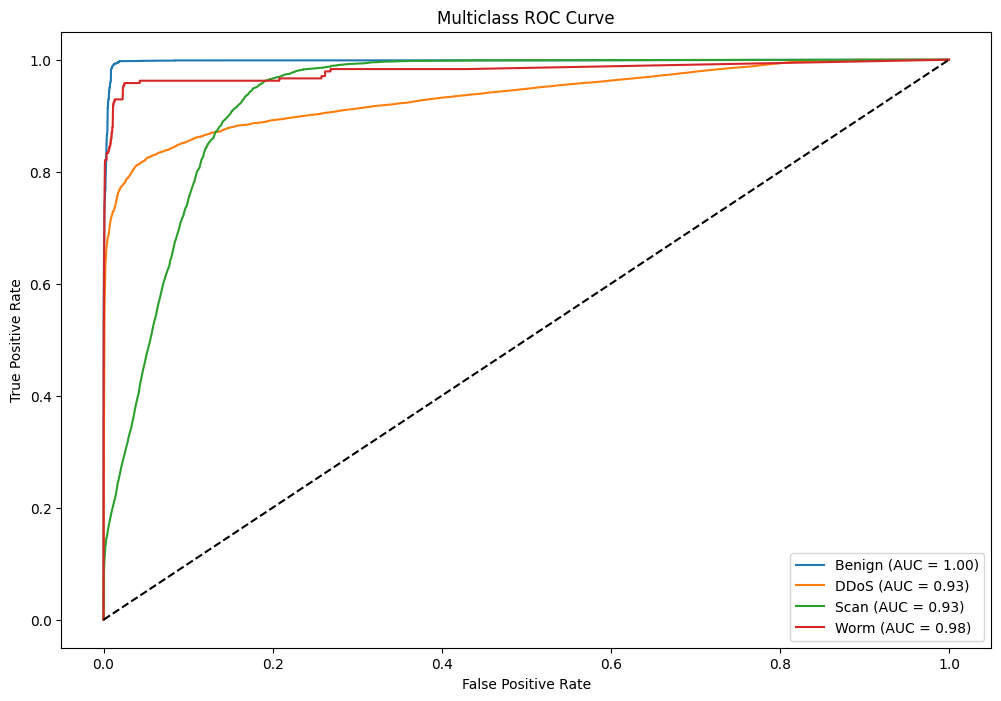

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for i, class_name in enumerate(unique_classes):
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

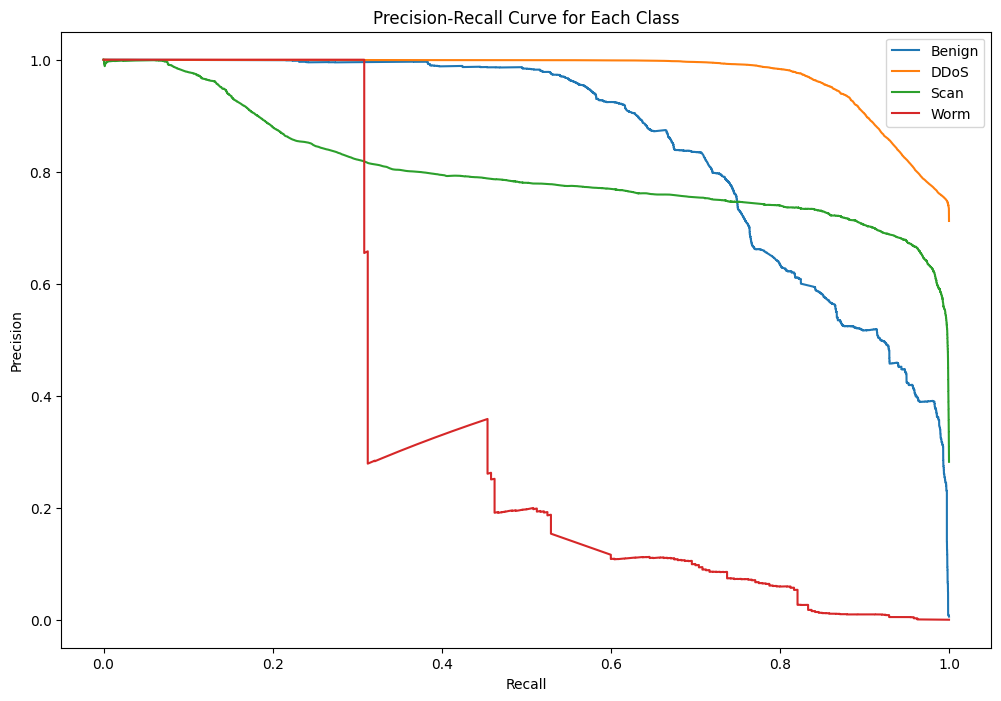

In [16]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(12, 8))

for i, class_name in enumerate(unique_classes):
    precision, recall, _ = precision_recall_curve(y_test_one_hot[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, label=f'{class_name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend()
plt.show()